In [1]:
#导入工具包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import cufflinks as cf
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.rcParams['font.sans-serif']=['SimHei']  #设置字体样式以正常显示中文标签
mpl.rcParams['axes.unicode_minus']=False   #设置正常显示字符

In [2]:
df = pd.read_excel(r'E:\DATA\order2021.xlsx')
df

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.420000,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.530000,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.910000,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.120000,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.040000,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否
5,116,sys-2021-327004821,user-182341,PR000028,446.61,384.060000,渠道1,微信公众号,2021-01-01 13:46:42,2021-01-01 13:47:01,否
6,125,sys-2021-231859284,user-230748,PR000184,746.27,627.120000,渠道1,微信公众号,2021-01-01 13:57:55,2021-01-01 13:58:16,否
7,148,sys-2021-355060894,user-214122,PR000826,205.78,2044.275720,渠道1,APP,2021-01-01 14:44:49,2021-01-01 14:45:21,是
8,161,sys-2021-319358365,user-162284,PR000828,574.45,498.080000,渠道1,微信公众号,2021-01-01 15:29:20,2021-01-01 15:31:18,否
9,175,sys-2021-386137983,user-123538,PR000469,324.96,249.440000,渠道1,APP,2021-01-01 16:12:34,2021-01-01 16:12:53,否


## 数据预处理

In [3]:
#对数据进行去文本空格处理
df.columns = df.columns.str.strip()
df.columns

Index(['订单顺序编号', '订单号', '用户名', '商品编号', '订单金额', '付款金额', '渠道编号', '平台类型', '下单时间',
       '付款时间', '是否退款'],
      dtype='object')

In [4]:
#查看数据集是否存在重复值
#两条记录中所有的数据都相等时duplicate才会判为重复值
df.duplicated().sum()

0

In [5]:
#查看数据缺失值
df.isnull().sum()
#结果显示，渠道编号有8个缺失值
#原数据集比较庞大，且缺失值不是分析目标的关键特征，所以选择删掉

订单顺序编号    0
订单号       0
用户名       0
商品编号      0
订单金额      0
付款金额      0
渠道编号      8
平台类型      0
下单时间      0
付款时间      0
是否退款      0
dtype: int64

In [6]:
#删除渠道编号缺失的数据
#检查是否删除成功
df.dropna(inplace=True)
df.isnull().sum()

订单顺序编号    0
订单号       0
用户名       0
商品编号      0
订单金额      0
付款金额      0
渠道编号      0
平台类型      0
下单时间      0
付款时间      0
是否退款      0
dtype: int64

In [7]:
#异常值处理
#查找付款金额小于0的数据
abnormal=df[np.where(df['付款金额'] < 0,True,False)]
abnormal

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
23860,66573,sys-2021-288096069,user-186966,PR000511,136.99,-12.34,渠道5,APP,2021-09-08 21:32:54,2021-09-08 21:33:10,否
24753,96939,sys-2021-323229098,user-198083,PR000548,126.92,-11.13,渠道5,APP,2021-12-10 14:24:13,2021-12-10 14:24:26,是
29600,31393,sys-2021-296608442,user-212991,PR000385,112.91,-10.17,渠道7,APP,2021-05-24 08:52:04,2021-05-24 08:52:23,否
35486,999,sys-2021-324068352,user-112962,PR000602,364.08,-12.47,渠道8,微信公众号,2021-01-04 10:47:05,2021-01-04 10:47:05,否
62781,72266,sys-2021-316685479,user-189901,PR000554,2287.74,-10.98,渠道11,微信公众号,2021-09-28 11:57:46,2021-09-28 11:57:46,否
71784,18684,sys-2021-311194385,user-110299,PR000797,118.06,-10.08,渠道13,web网站,2021-04-06 11:20:43,2021-04-06 11:21:31,否


In [8]:
#提取异常值的索引
abindex = abnormal.index
abindex

Int64Index([23860, 24753, 29600, 35486, 62781, 71784], dtype='int64')

In [9]:
#删除付款金额小于0的数据
df.drop(abindex,inplace=True)

In [10]:
df.shape

(104543, 11)

## RFM模型构建

In [11]:
#筛选没有退款的订单
df1 = df[np.where(df['是否退款']=='否',True,False)]
df1

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.420000,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.530000,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.910000,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.120000,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.040000,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否
5,116,sys-2021-327004821,user-182341,PR000028,446.61,384.060000,渠道1,微信公众号,2021-01-01 13:46:42,2021-01-01 13:47:01,否
6,125,sys-2021-231859284,user-230748,PR000184,746.27,627.120000,渠道1,微信公众号,2021-01-01 13:57:55,2021-01-01 13:58:16,否
8,161,sys-2021-319358365,user-162284,PR000828,574.45,498.080000,渠道1,微信公众号,2021-01-01 15:29:20,2021-01-01 15:31:18,否
9,175,sys-2021-386137983,user-123538,PR000469,324.96,249.440000,渠道1,APP,2021-01-01 16:12:34,2021-01-01 16:12:53,否
10,181,sys-2021-318802951,user-193849,PR000918,308.03,308.030000,渠道1,web网站,2021-01-01 17:01:39,2021-01-01 17:03:01,否


In [12]:
#构建子表
df2=df1.loc[:,['订单号','用户名','付款金额','付款时间']]
df2.head()

,订单号,用户名,付款金额,付款时间
0,sys-2021-306447069,user-104863,480.42,2021-01-01 01:06:17
1,sys-2021-417411381,user-181957,279.53,2021-01-01 01:36:56
2,sys-2021-313655292,user-282453,1653.91,2021-01-01 12:03:20
3,sys-2021-311884106,user-167776,337.12,2021-01-01 12:47:21
4,sys-2021-375273222,user-138024,329.04,2021-01-01 12:50:50


In [13]:
#将交易日期处理为日期数据类型
df2['付款时间'] = pd.to_datetime(df2['付款时间'],format='%Y%m%d')
#假设2022-01-01是计算当天,求交易日期到计算当天的距离天数
df2['至今天数'] = pd.to_datetime('2022-01-01') - df2['付款时间']
#从时间距离中获取天数
df2['至今天数'] = df2['至今天数'].dt.days
df2

,订单号,用户名,付款金额,付款时间,至今天数
0,sys-2021-306447069,user-104863,480.420000,2021-01-01 01:06:17,364
1,sys-2021-417411381,user-181957,279.530000,2021-01-01 01:36:56,364
2,sys-2021-313655292,user-282453,1653.910000,2021-01-01 12:03:20,364
3,sys-2021-311884106,user-167776,337.120000,2021-01-01 12:47:21,364
4,sys-2021-375273222,user-138024,329.040000,2021-01-01 12:50:50,364
5,sys-2021-327004821,user-182341,384.060000,2021-01-01 13:47:01,364
6,sys-2021-231859284,user-230748,627.120000,2021-01-01 13:58:16,364
8,sys-2021-319358365,user-162284,498.080000,2021-01-01 15:31:18,364
9,sys-2021-386137983,user-123538,249.440000,2021-01-01 16:12:53,364
10,sys-2021-318802951,user-193849,308.030000,2021-01-01 17:03:01,364


In [14]:
#构建R：统计每个客户距离制定日期多久没有消费了，找出最小的最近消费距离
R = df2.groupby(by=['用户名'],as_index=False)['至今天数'].agg('min')
R

,用户名,至今天数
0,user-100000,79
1,user-100003,221
2,user-100006,47
3,user-100007,351
4,user-100008,45
5,user-100013,93
6,user-100014,154
7,user-100018,7
8,user-100022,45
9,user-100025,163


In [15]:
#构建F：统计每个客户交易的总次数，即对订单号计数
F = df2.groupby(by=['用户名'],as_index=False)['订单号'].agg('count')
F

,用户名,订单号
0,user-100000,1
1,user-100003,1
2,user-100006,1
3,user-100007,1
4,user-100008,1
5,user-100013,1
6,user-100014,1
7,user-100018,1
8,user-100022,2
9,user-100025,1


In [16]:
#构建M：统计每个客户交易的总额，即对付款金额求和
M = df2.groupby(by=['用户名'],as_index=False)['付款金额'].agg('sum')
M

,用户名,付款金额
0,user-100000,1770.81
1,user-100003,511.59
2,user-100006,443.55
3,user-100007,2162.14
4,user-100008,4879.94
5,user-100013,556.96
6,user-100014,373.46
7,user-100018,371.50
8,user-100022,3803.91
9,user-100025,49.99


In [17]:
#将R、F、M三个数据框关联，merge默认内连接，可省略，两表on条件的关联列名均为‘用户名’，同样可省略
RFMData = R.merge(F).merge(M)
#修改列名
RFMData.columns = ['用户名','R','F','M']
RFMData

,用户名,R,F,M
0,user-100000,79,1,1770.81
1,user-100003,221,1,511.59
2,user-100006,47,1,443.55
3,user-100007,351,1,2162.14
4,user-100008,45,1,4879.94
5,user-100013,93,1,556.96
6,user-100014,154,1,373.46
7,user-100018,7,1,371.50
8,user-100022,45,2,3803.91
9,user-100025,163,1,49.99


对R、F、M分组打分<br>
本例将R、F、M三列分别按照各自的平均值划分为2个组，并赋值1分、2分。<br>
R分值（R_S）：定义为距离指定日期越近，R_S越大，R>=平均值，R_S为1，R<平均值，R_S为2。<br>
F分值（F_S）：定义为交易频率越高，F_S越大，F<=平均值，F_S为1，F>平均值，F_S为2。<br>
M分值（M_S）：定义为交易金额越高，M_S越大，M<=平均值，M_S为1，M>平均值，M_S为2。

In [18]:
#判断R列是否大于等于R列的平均值，将符合条件R_S列的值赋值为1,小于平均值赋值为2
RFMData['R_S']=np.where(RFMData['R']>=RFMData['R'].mean(),1,2)
#同R_S赋值方法，对F_S、M_S进行赋值，但与R相反，F、M均为越大越好
RFMData['F_S']=np.where(RFMData['F']>=RFMData['F'].mean(),2,1)
RFMData['M_S']=np.where(RFMData['M']>=RFMData['M'].mean(),2,1)
RFMData

,用户名,R,F,M,R_S,F_S,M_S
0,user-100000,79,1,1770.81,2,1,2
1,user-100003,221,1,511.59,1,1,1
2,user-100006,47,1,443.55,2,1,1
3,user-100007,351,1,2162.14,1,1,2
4,user-100008,45,1,4879.94,2,1,2
5,user-100013,93,1,556.96,2,1,1
6,user-100014,154,1,373.46,1,1,1
7,user-100018,7,1,371.50,2,1,1
8,user-100022,45,2,3803.91,2,2,2
9,user-100025,163,1,49.99,1,1,1


In [19]:
rfmData = RFMData.iloc[:,[0,-3,-2,-1]]
rfmData

,用户名,R_S,F_S,M_S
0,user-100000,2,1,2
1,user-100003,1,1,1
2,user-100006,2,1,1
3,user-100007,1,1,2
4,user-100008,2,1,2
5,user-100013,2,1,1
6,user-100014,1,1,1
7,user-100018,2,1,1
8,user-100022,2,2,2
9,user-100025,1,1,1


In [20]:
#计算RFM综合分值
rfmData['RFM']=rfmData['R_S'].map(str)+rfmData['F_S'].map(str)+rfmData['M_S'].map(str)
rfmData.head()

,用户名,R_S,F_S,M_S,RFM
0,user-100000,2,1,2,212
1,user-100003,1,1,1,111
2,user-100006,2,1,1,211
3,user-100007,1,1,2,112
4,user-100008,2,1,2,212


In [21]:
#定义RFM综合分值与客户类型的对应关系表
CustomerType=pd.DataFrame(data={'RFM':['111','112','121','122','211','212','221','222'],'Type':['一般挽留客户','重要挽留客户','一般保持客户','重要保持客户','一般发展客户','重要发展客户','一般价值客户','重要价值客户']},index=None)
CustomerType

,RFM,Type
0,111,一般挽留客户
1,112,重要挽留客户
2,121,一般保持客户
3,122,重要保持客户
4,211,一般发展客户
5,212,重要发展客户
6,221,一般价值客户
7,222,重要价值客户


In [22]:
#将RFMData与RFM综合分值客户类型的对应关系表合并为一个数据框
#CustomerType['RFM'] = rfmData['RFM'].apply(int)
RFMData2=pd.merge(rfmData, CustomerType, on='RFM')
RFMData2

,用户名,R_S,F_S,M_S,RFM,Type
0,user-100000,2,1,2,212,重要发展客户
1,user-100008,2,1,2,212,重要发展客户
2,user-100030,2,1,2,212,重要发展客户
3,user-100034,2,1,2,212,重要发展客户
4,user-100068,2,1,2,212,重要发展客户
5,user-100076,2,1,2,212,重要发展客户
6,user-100095,2,1,2,212,重要发展客户
7,user-100124,2,1,2,212,重要发展客户
8,user-100147,2,1,2,212,重要发展客户
9,user-100213,2,1,2,212,重要发展客户


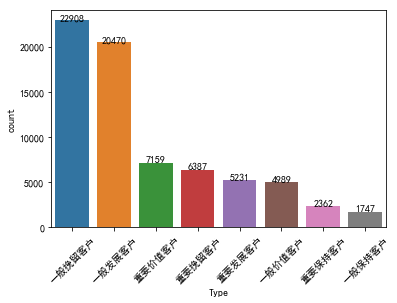

In [23]:
#RMF模型可视化
import seaborn as sns
v = RFMData2['Type'].value_counts()
plt.xticks(rotation=45)
ax = sns.countplot(x=RFMData2['Type'],order=v.index)
#在图像上绘制数值
for x,y in enumerate(v):
    text = ax.text(x,y,y)
    #文本数据居中对齐
    text.set_ha('center')

小结：<br>
RFM模型只提供了R、F、M三个维度，对于每个维度上的划分标准没有绝对的标准<br>
划分标准主要有以下四类：<br>
1.均值<br>
2.中位数<br>
3.对R、F、M赋予权重：可以凭借业务经验，也可以用层次分析法赋予权重<br>
RFM模型的划分标准具有一定主观性，为了相对客观的对用户分层，可以采用聚类算法来实现

## K-Means聚类算法

In [24]:
#获取R,F,M数据
dataA = RFMData.iloc[:,:-3]
dataB = dataA.set_index('用户名')
dataB.head()

,R,F,M
用户名,,,
user-100000,79,1,1770.81
user-100003,221,1,511.59
user-100006,47,1,443.55
user-100007,351,1,2162.14
user-100008,45,1,4879.94


In [25]:
#由于RFM量纲不同，可能导致聚类结果不好，所以我们先进行数据标准化
#采用StandardScaler方法对数据规范化：均值为0，方差为1的正态分布
g = StandardScaler()
stand_data = g.fit_transform(dataB)
stand_data = pd.DataFrame(stand_data,columns=dataB.columns,index=dataB.index)
stand_data.head()

,R,F,M
用户名,,,
user-100000,-0.701066,-0.4958,0.110680
user-100003,0.717193,-0.4958,-0.380447
user-100006,-1.020674,-0.4958,-0.406984
user-100007,2.015600,-0.4958,0.263309
user-100008,-1.040650,-0.4958,1.323319


手肘法看K值

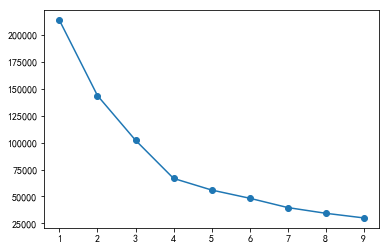

In [26]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 0).fit(stand_data)
    kmeans.fit(stand_data)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,10),SSE,marker = 'o')
plt.show()

根据上图显示，当k为4或5时，效果较好<br>
接下来使用轮廓系数看K值:轮廓系数是描述簇内外差异的关键指标,越接近1，聚类效果越好

In [27]:
kc = KMeans(n_clusters=4,random_state=12)
kc.fit(stand_data)
silhouette_score(stand_data,kc.labels_)

0.4791988563405966

In [28]:
kc = KMeans(n_clusters=5,random_state=12)
kc.fit(stand_data)
silhouette_score(stand_data,kc.labels_)

0.4949164869307785

In [29]:
#获取最佳分簇数模型，这里我们取5
kmeans = KMeans(n_clusters = 5, random_state = 20).fit(stand_data)
#添加label
dataB['labels'] = kmeans.labels_
dataB

,R,F,M,labels
用户名,,,,
user-100000,79,1,1770.81,1
user-100003,221,1,511.59,3
user-100006,47,1,443.55,1
user-100007,351,1,2162.14,3
user-100008,45,1,4879.94,1
user-100013,93,1,556.96,1
user-100014,154,1,373.46,1
user-100018,7,1,371.50,1
user-100022,45,2,3803.91,0


In [30]:
# 统计一下各类用户之间的差异
dataB['labels'].value_counts(normalize=True)   # normalize=True显示占比

1    0.405429
3    0.366539
0    0.183698
2    0.038904
4    0.005431
Name: labels, dtype: float64

In [31]:
# 提取质心
kmeans.cluster_centers_

array([[-4.94483481e-01,  1.30883842e+00,  2.65699517e-01],
       [-6.72821362e-01, -4.95800278e-01, -1.83413234e-01],
       [-7.32286975e-01,  3.41959997e+00,  7.38013041e-01],
       [ 1.06983154e+00, -4.75486206e-01, -1.55813739e-01],
       [-5.51148373e-03,  3.37039938e-01,  9.93363253e+00]])

In [32]:
rfm_data_centers = pd.DataFrame(kmeans.cluster_centers_,columns=['R','F','M'])
rfm_data_centers

,R,F,M
0,-0.494483,1.308838,0.265700
1,-0.672821,-0.495800,-0.183413
2,-0.732287,3.419600,0.738013
3,1.069832,-0.475486,-0.155814
4,-0.005511,0.337040,9.933633


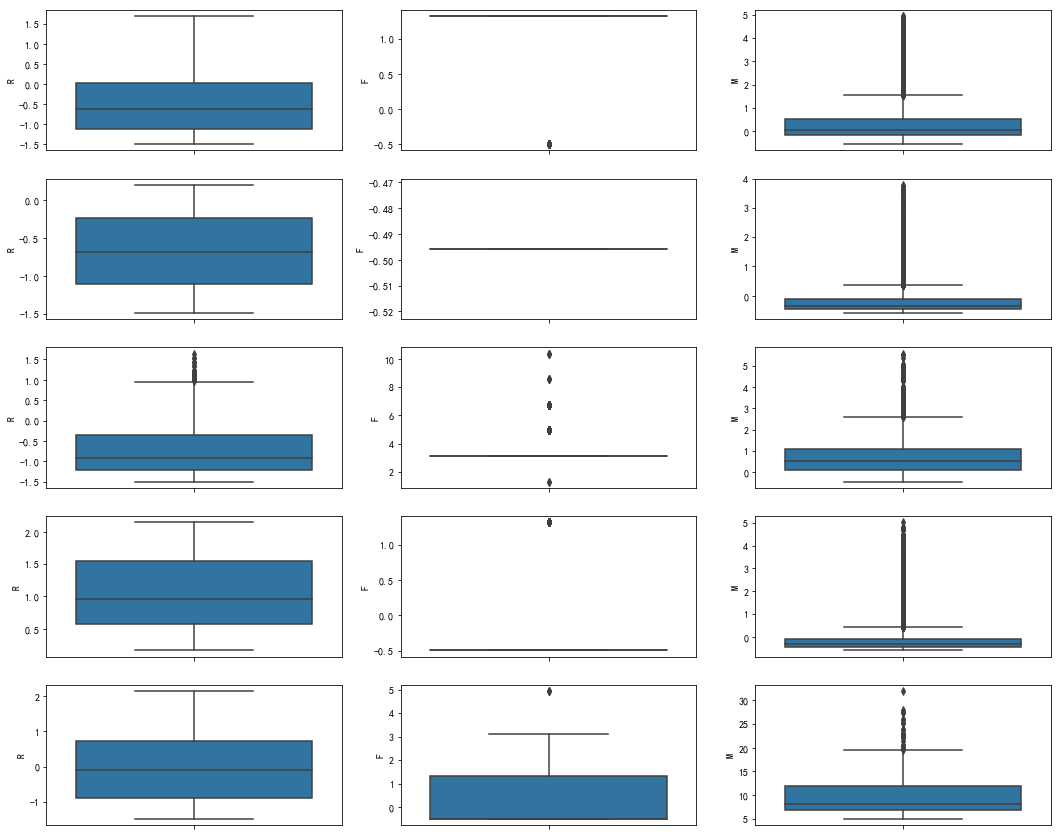

In [33]:
fig,ax = plt.subplots(5,3)
fig.set_size_inches(18,15)
for i in range(5):
    #获取第i个客户群的数据
    de = stand_data[kmeans.labels_==i]
    sns.boxplot(y='R',data=de,ax=ax[i][0])
    sns.boxplot(y='F',data=de,ax=ax[i][1])
    sns.boxplot(y='M',data=de,ax=ax[i][2])

In [34]:
R_label = np.where(rfm_data_centers['R']>rfm_data_centers['R'].median(),1,2)    
F_label = np.where(rfm_data_centers['F']>rfm_data_centers['F'].median(),2,1)     
M_label = np.where(rfm_data_centers['M']>rfm_data_centers['M'].median(),2,1)    

rfm_data_centers_label = pd.DataFrame([R_label,F_label,M_label]).T
rfm_data_centers_label.rename(columns={0:'R',1:'F',2:'M'},inplace = True)
rfm_data_centers_label

,R,F,M
0,2,2,1
1,2,1,1
2,2,2,2
3,1,1,1
4,1,1,2


In [35]:
rfm_data_centers_label['RFM']=rfm_data_centers_label['R'].map(str)+rfm_data_centers_label['F'].map(str)+rfm_data_centers_label['M'].map(str)
rfm_data_centers_label.head()

,R,F,M,RFM
0,2,2,1,221
1,2,1,1,211
2,2,2,2,222
3,1,1,1,111
4,1,1,2,112


In [36]:
CustomerType

,RFM,Type
0,111,一般挽留客户
1,112,重要挽留客户
2,121,一般保持客户
3,122,重要保持客户
4,211,一般发展客户
5,212,重要发展客户
6,221,一般价值客户
7,222,重要价值客户


In [37]:
rfm_data_centers_label2=pd.merge(rfm_data_centers_label, CustomerType, on='RFM')
rfm_data_centers_label2

,R,F,M,RFM,Type
0,2,2,1,221,一般价值客户
1,2,1,1,211,一般发展客户
2,2,2,2,222,重要价值客户
3,1,1,1,111,一般挽留客户
4,1,1,2,112,重要挽留客户


In [38]:
rfm_data_centers_label3 = pd.merge(rfm_data_centers_label, CustomerType,on='RFM' ,how='left')
rfm_data_centers_label3['labels'] = rfm_data_centers_label3.index
rfm_data_centers_label3

,R,F,M,RFM,Type,labels
0,2,2,1,221,一般价值客户,0
1,2,1,1,211,一般发展客户,1
2,2,2,2,222,重要价值客户,2
3,1,1,1,111,一般挽留客户,3
4,1,1,2,112,重要挽留客户,4


In [39]:
RFM_df = pd.merge(dataB,rfm_data_centers_label3[['labels','Type']],on='labels',how='left')
RFM_df

,R,F,M,labels,Type
0,79,1,1770.81,1,一般发展客户
1,221,1,511.59,3,一般挽留客户
2,47,1,443.55,1,一般发展客户
3,351,1,2162.14,3,一般挽留客户
4,45,1,4879.94,1,一般发展客户
5,93,1,556.96,1,一般发展客户
6,154,1,373.46,1,一般发展客户
7,7,1,371.50,1,一般发展客户
8,45,2,3803.91,0,一般价值客户
9,163,1,49.99,1,一般发展客户


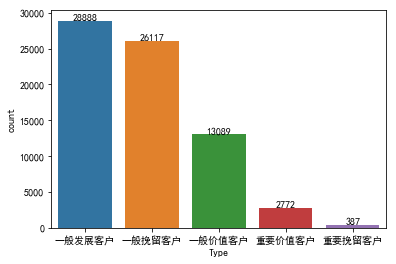

In [40]:
#统计每个类别群体的数量
qt = pd.Series(RFM_df.Type).value_counts()
ax = sns.countplot(x=RFM_df.Type,order=qt.index)
#在图像上绘制数值
for x,y in enumerate(qt):
    text = ax.text(x,y,y)
    text.set_ha('center')

在RFM模型中，我们将用户分为8类，数量最多的是新客户与流失客户。<br>
在Kmeans算法分类中，我们发现手肘法则给出最佳K值为5，数量最多的也是是新客户与流失客户。<br>
对于新客户可以采取社群活动、提供免费试用等方式提高新客户购买的兴趣；<br>
而流失客户则可以尝试使用优惠券或者老客户优惠等方式尝试召回，如召回效果不明显，可以尝试暂时放弃；<br>
对于最近有购买、购买频率和金额都很高的重要价值用户应重点关注，既要保持其粘性，又要继续引导消费，长期联络，定期回访，一对一客服服务。